In [1]:
from pathlib import Path
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %matplotlib inline
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
import pandas as pd 
import geopandas as gpd
import pygeos
import seaborn as sns
import xarray as xr
import rioxarray as rio
from matplotlib.colors import LinearSegmentedColormap
import datetime
from datetime import timedelta
from scipy.spatial.distance import cdist
from math import dist
from scipy.stats import ttest_ind
from geopy import distance
from scipy import stats
from matplotlib.gridspec import GridSpec
from pylr2 import regress2
from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)
from matplotlib.ticker import MaxNLocator,FixedLocator
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde

# import shutil

/Users/weitao/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
GEMS_MD = pd.read_pickle('GEMS_MD2')
GEMS_MD['Type'] = 'multi-axis'
GEMS_DS = pd.read_pickle('GEMS_DS2')
GEMS_DS['Type'] = 'direct-sun'

GEMS_DS

,ID,VCD(moles/m2),Lat,Lon,Altitude,Year,Month,Day,Hour,Minute,...,Wind_velocity,vcd0,ratio,VCD,DVCD,Location,Season,tz,Localtime,Type
26591,2023053002 Agam,0.000088,-0.2046,100.3195,865.0,2023,5,30,1,9.0,...,0.344420,5.055692,-0.719352,5.304298,-12.083811,Agam,Spring,7,2023-05-30 09:00:00,direct-sun
21980,2023020803 Agam,0.000142,-0.2046,100.3195,865.0,2023,2,8,2,50.5,...,0.166363,5.660730,-3.092624,8.535583,-7.491128,Agam,Winter,7,2023-02-08 10:00:00,direct-sun
30861,2023092505 Agam,0.000165,-0.2046,100.3195,865.0,2023,9,25,4,29.0,...,2.989497,4.088177,0.870078,9.953162,0.610457,Agam,Autumn,7,2023-09-25 12:00:00,direct-sun
30687,2023091804 Agam,0.000238,-0.2046,100.3195,865.0,2023,9,18,3,47.0,...,0.718474,4.263793,-0.512616,14.337780,-12.581498,Agam,Autumn,7,2023-09-18 11:00:00,direct-sun
24745,2023041408 Agam,0.000159,-0.2046,100.3195,865.0,2023,4,14,7,27.0,...,1.558179,6.083335,1.217076,9.594250,-1.085017,Agam,Spring,7,2023-04-14 15:00:00,direct-sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13017,2022052702 Kobe,0.000168,34.7190,135.2900,23.0,2022,5,27,1,54.0,...,3.968108,5.466670,0.804461,10.121778,1.328775,Kobe,Spring,9,2022-05-27 11:00:00,direct-sun
12505,2022051802 Kobe,0.000144,34.7190,135.2900,23.0,2022,5,18,1,52.0,...,0.867754,6.243176,1.615447,8.700586,-2.378501,Kobe,Spring,9,2022-05-18 11:00:00,direct-sun
10308,2022040101 Kobe,0.000072,34.7190,135.2900,23.0,2022,4,1,0,29.5,...,12.170037,5.035966,1.547561,4.309554,-1.781835,Kobe,Spring,9,2022-04-01 10:00:00,direct-sun
8916,2022022703 Kobe,0.000121,34.7190,135.2900,23.0,2022,2,27,2,3.0,...,8.523194,3.648318,-1.996004,7.262532,-5.476129,Kobe,Winter,9,2022-02-27 12:00:00,direct-sun


In [3]:
pandora3 = pd.concat([GEMS_MD,GEMS_DS]).sort_values('loca').reset_index()
pandora3['hour']=pandora3['Localtime'].dt.hour
pandora3

,index,VCD(moles/m2),Lat,Lon,Hour,time,loca,datetime,GEMS,AMFCloudFraction,...,Year,Type,ID,Altitude,Day,Minute,TotalUncertainty,RmsUncertainty,L1Height,hour
0,30926,0.000280,-0.2046,100.3195,6,2023092706,Agam,2023-09-27 06:45:00,3.050696,0.045620,...,2023,direct-sun,2023092707 Agam,865.0,27,49.0,0.000018,0.000019,0.0,14
1,26608,0.000124,-0.2046,100.3195,7,2023053007,Agam,2023-05-30 07:45:00,17.220079,0.166661,...,2023,direct-sun,2023053008 Agam,865.0,30,54.0,0.000013,0.000021,0.0,15
2,29223,0.000125,-0.2046,100.3195,3,2023080403,Agam,2023-08-04 03:45:00,12.366321,0.031724,...,2023,direct-sun,2023080404 Agam,865.0,4,30.0,0.000016,0.000024,0.0,11
3,27390,0.000112,-0.2046,100.3195,1,2023061901,Agam,2023-06-19 01:45:00,5.225744,0.055174,...,2023,direct-sun,2023061902 Agam,865.0,19,6.0,0.000012,0.000014,0.0,9
4,27022,0.000165,-0.2046,100.3195,1,2023061001,Agam,2023-06-10 01:45:00,2.159700,0.087643,...,2023,direct-sun,2023061002 Agam,865.0,10,12.0,0.000012,0.000019,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44885,22998,0.000223,35.3207,139.6508,23,2022051723,Yokosuka,2022-05-17 23:45:00,1.750512,0.098722,...,2022,multi-axis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
44886,7312,0.000175,35.3207,139.6508,2,2021100302,Yokosuka,2021-10-03 02:45:00,7.795395,0.200981,...,2021,multi-axis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
44887,11906,0.000078,35.3207,139.6508,2,2022011202,Yokosuka,2022-01-12 02:45:00,9.309921,0.172118,...,2022,multi-axis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
44888,24318,0.000127,35.3207,139.6508,23,2022052823,Yokosuka,2022-05-28 23:45:00,2.780184,0.000000,...,2022,multi-axis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [4]:
def removeOne(df):
    counttt = 0
    indexx = df['hour'].value_counts().index
    for i in df['hour'].value_counts().values:
        if i==1:
            bef = len(df)
            df = df[df['hour']!=indexx[counttt]]
            aft = len(df)
            print(sds[count]+str(bef-aft)+'Removed!'+str(indexx[counttt]))
        counttt = counttt +1
    return df

/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_22815/1969142522.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly = hourly.groupby(['Location','Hour']).mean().reset_index()
/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_22815/1969142522.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly = hourly.groupby(['Location','Hour']).mean().reset_index()


Bangkok1Removed!11
Dhaka1Removed!9


Text(0.02, 0.5, 'HCHO VCD (10$^{15}$ molecules cm$^{-2}$)')

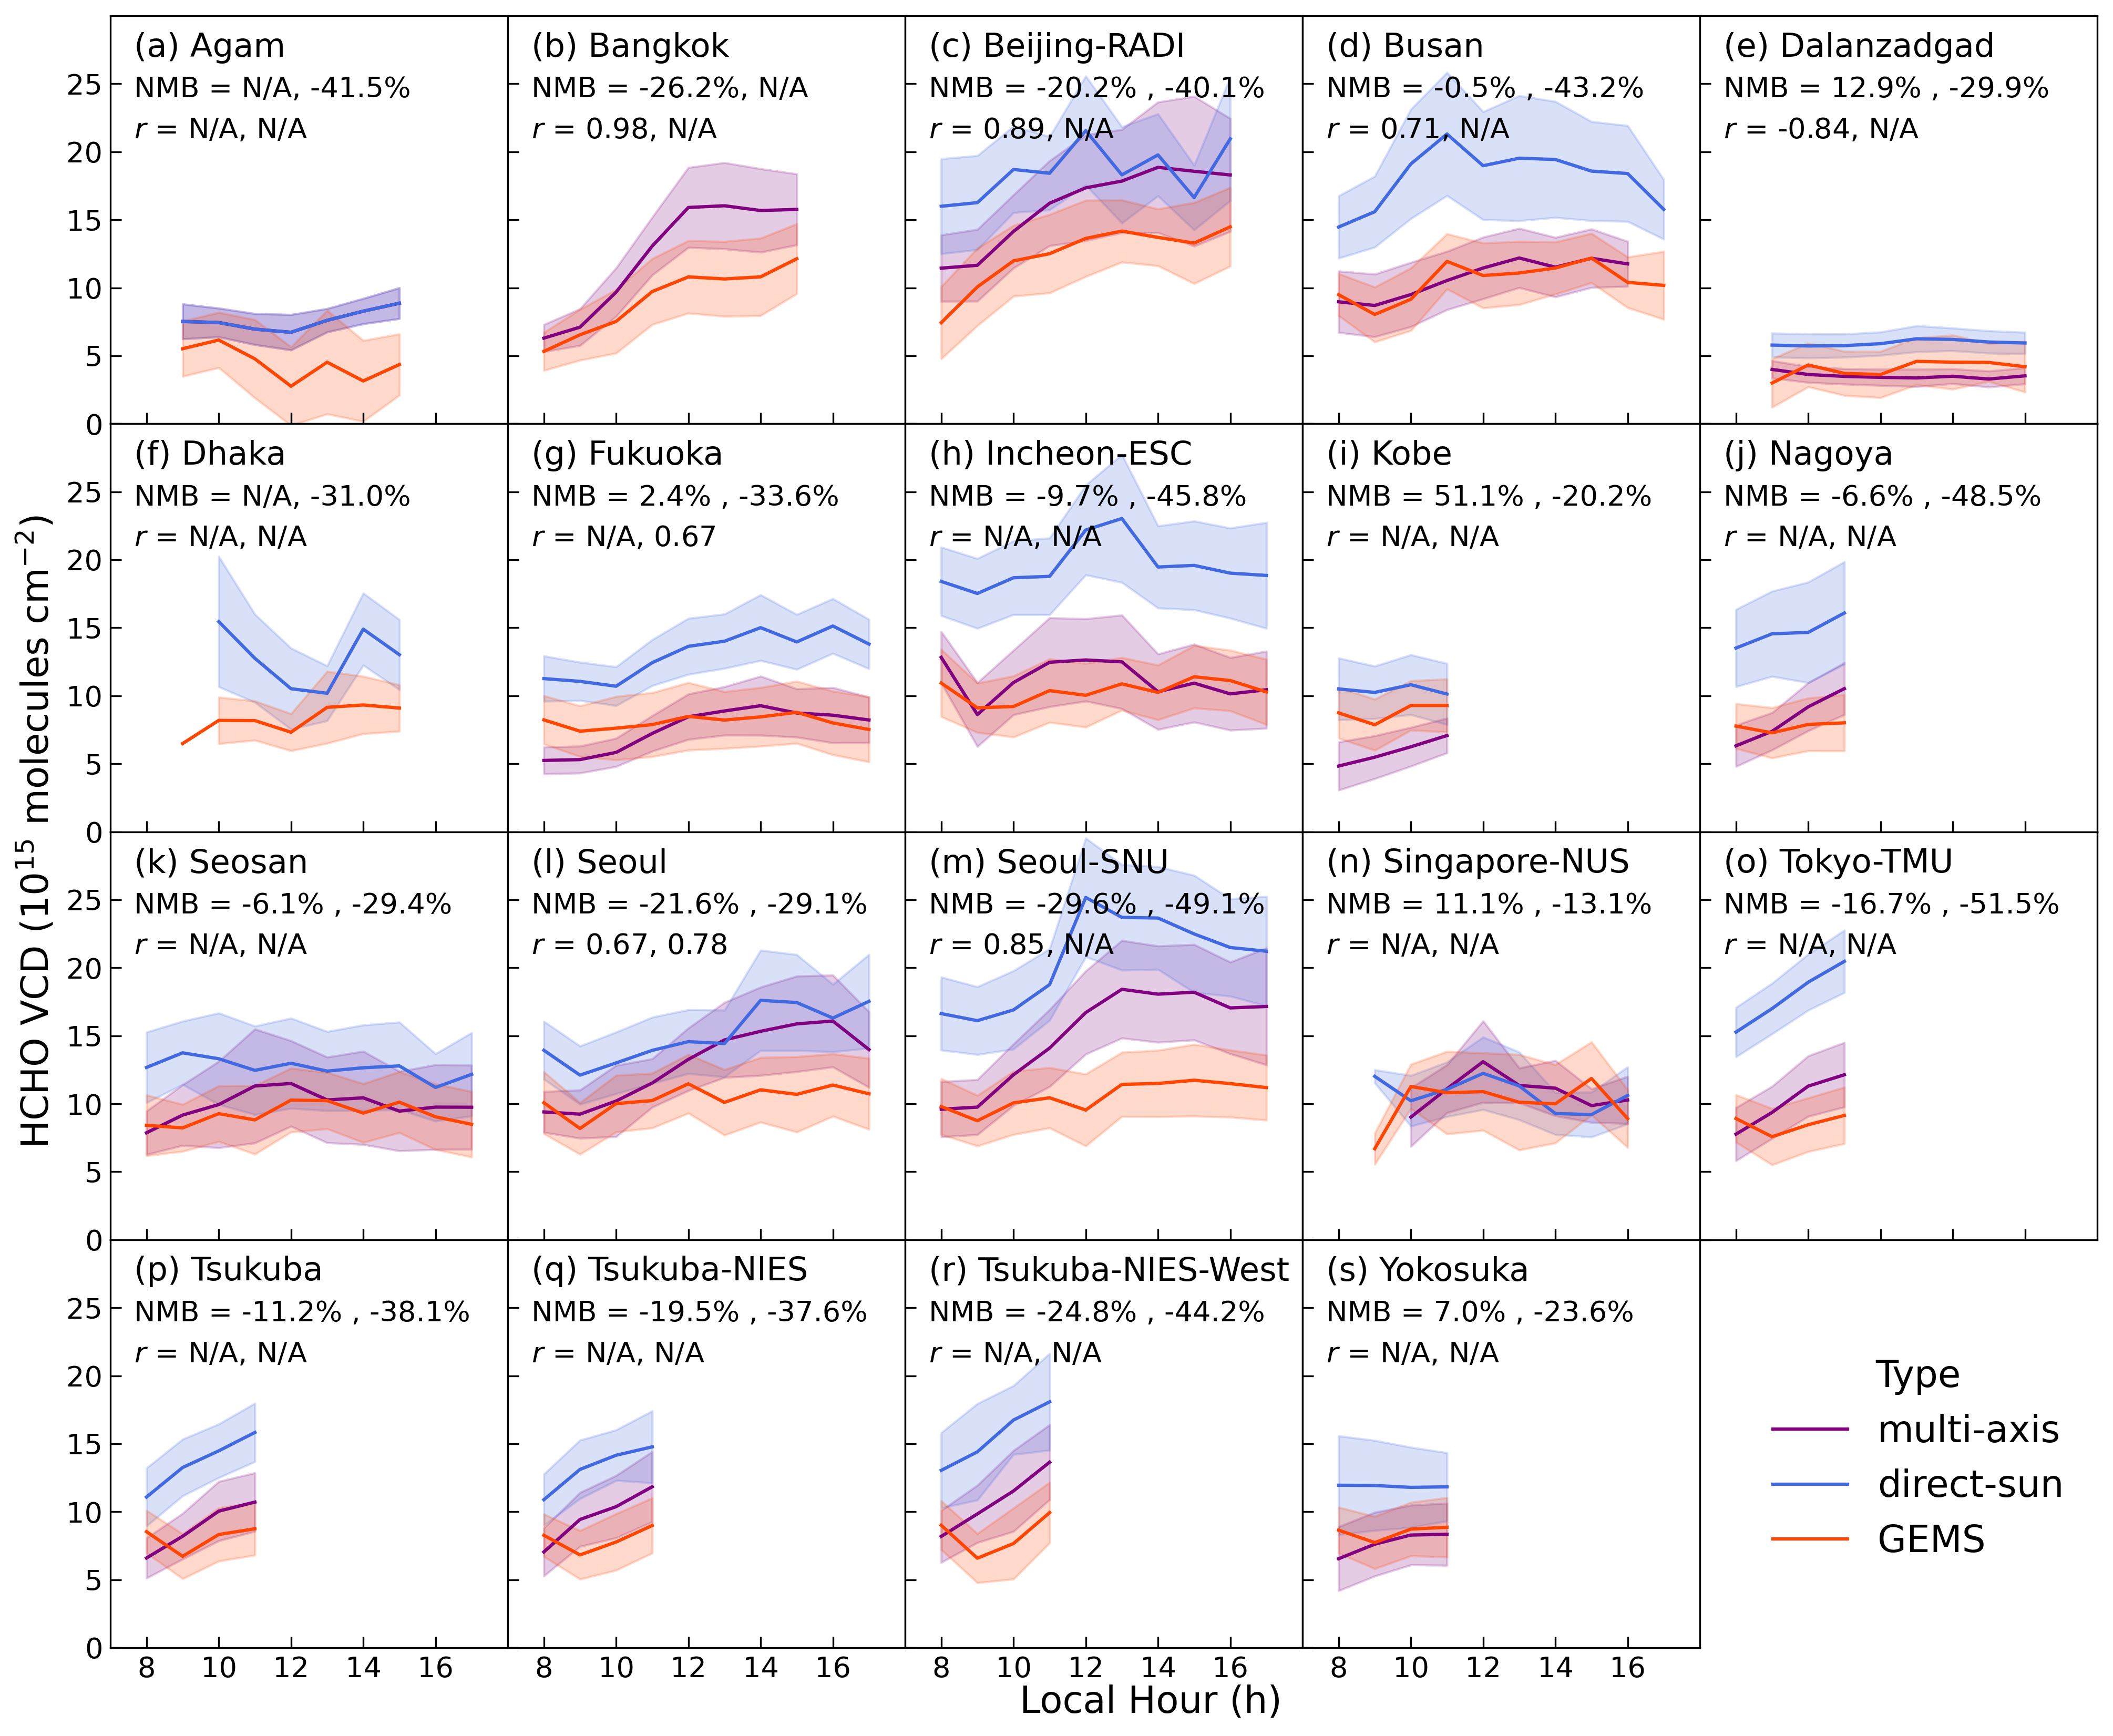

In [8]:
fig = plt.figure(figsize=(15, 11.5),dpi=300)
plt.subplots_adjust(wspace=0, hspace=0,top=0.95,left=0.06,bottom=0.05)
sz = 'Summer'
hourly2 = pandora3.sort_values(['Lat']).copy()

hourly2 = hourly2[hourly2['Season']==sz]

hourly2 = hourly2.sort_values(['Location'])
sds = list(hourly2['Location'].unique())
axs = [plt.subplot(4,5,i+1,) for i in range(len(sds))]
# axs = [plt.subplot(round(len(sds)/5),5,i+1,) for i in range(len(sds))]
alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


###################################################################
hourly = GEMS_MD[GEMS_MD['Season']==sz]
hourly = hourly.groupby(['Location','Hour']).mean().reset_index()

hourRMD = pd.DataFrame(columns = ['Location','R','p', 'N','bias'])

for i in list(hourly['Location'].unique()):
    temp = hourly[hourly['Location']==i]
    try:
        r = stats.pearsonr(temp['VCD'],temp['GEMS'])[0]
        p = stats.pearsonr(temp['VCD'],temp['GEMS'])[1]
        N = len(temp['Location'])
        bis = (temp['GEMS'].mean()-temp['VCD'].mean())/temp['VCD'].mean()
        hourRMD.loc[len(hourRMD.index)] = [i, r, p, N,bis]
    except: 
        hourRMD.loc[len(hourRMD.index)] = [i, 'N/A', 'N/A', 'N/A','N/A']
hourRMD = hourRMD.set_index('Location')

###################################################################
hourly = GEMS_DS[GEMS_DS['Season']==sz]
hourly = hourly.groupby(['Location','Hour']).mean().reset_index()

hourRDS = pd.DataFrame(columns = ['Location','R','p', 'N','bias'])

for i in list(hourly['Location'].unique()):
    temp = hourly[hourly['Location']==i]
    try:
        r = stats.pearsonr(temp['VCD'],temp['GEMS'])[0]
        p = stats.pearsonr(temp['VCD'],temp['GEMS'])[1]
        N = len(temp['Location'])
        bis = (temp['GEMS'].mean()-temp['VCD'].mean())/temp['VCD'].mean()
        hourRDS.loc[len(hourRDS.index)] = [i, r, p, N,bis]
    except: 
        hourRDS.loc[len(hourRDS.index)] = [i, 'N/A', 'N/A', 'N/A','N/A']
hourRDS = hourRDS.set_index('Location')

###################################################################


# monthR=hourR.copy()
count = 0
lgd = False
# formatter = DateFormatter('%Y.%#m')
for a in axs:
    temp = hourly2[(hourly2['Location']==sds[count])]
    multia =temp[temp['Type']=='multi-axis'].copy()
    directs =temp[temp['Type']=='direct-sun'].copy()
    multia = removeOne(multia)
    directs = removeOne(directs)
#     for pdr in [multia, directs]:
#         counttt = 0
#         indexx = pdr['hour'].value_counts().index
#         for i in pdr['hour'].value_counts().values:
#             if i<3:
#                 bef = len(pdr)
#                 pdr = pdr[pdr['hour']!=indexx[counttt]]
#                 aft = len(pdr)
#                 print(sds[count]+str(bef-aft)+'Removed!'+str(indexx[counttt]))
#             counttt = counttt +1
    a.set_ylim(0,30)
    a.set_xlim(7,18)
    
    if (count ==0):
        lgd = True
#         if sz!='Summer':
        # dummy legend
        temp2 = hourly2[(hourly2['Location']=="Agam")].copy()
        temp2['Type'] = 'multi-axis'
        sns.lineplot(data=temp2[temp2['Type']=='multi-axis'], x='hour',y='VCD',label='multi-axis',ax = axs[count],legend=lgd,errorbar=('sd',0.5),markers=True, color='purple')

    else:
        lgd = False
#     a.set_xlim(datetime.datetime(2020,12,2),datetime.datetime(2023,12,2))
    sns.lineplot(data=multia, x='hour',y='VCD',label='multi-axis',ax = axs[count],legend=lgd,errorbar=('sd',0.5),markers=True, color='purple')
    sns.lineplot(data=directs, x='hour',y='VCD',label='direct-sun',ax = axs[count],legend=lgd,errorbar=('sd',0.5),markers=True, color='royalblue')
        
    sns.lineplot(data=temp, x='hour',y='GEMS',label='GEMS',ax = axs[count],legend=lgd,errorbar=('sd',0.5),markers=True, color='orangered')

    #     sns.lineplot(data=temp, x='hour',y='vcd0',label='VCD0',ax = axs[count],legend=lgd,errorbar=('sd',0.5),markers=True, color='yellow')
#     sns.lineplot(data=validata33[validata33['loca']==sds[count]], x='datetime',y='VCD',label='Pandora',ax = a,legend=lgd,errorbar='se',markers=True, color='royalblue')
#     sns.lineplot(data=validata33[validata33['loca']==sds[count]], x='datetime',y='GEMS',label='GEMS',ax = a,legend=lgd,errorbar='se',markers=True, color='red')
    if (count ==0):
        
        fig.legend(loc='lower right', bbox_to_anchor=(0.9, 0.08), title='Type', frameon=False,title_fontsize =17,markerscale=3,fontsize =17
                  ) # Witth,Height
        a.get_legend().remove()
    lgd = False
    a.text(0.06,0.9,'('+alp[count]+') '+sds[count],transform=axs[count].transAxes,size=15)
    a.set_xlabel('', labelpad = 0.1,color='white')
    a.set_ylabel('', labelpad = 0.1,color='white')
    a.set_xticks(range(8,18,2))
    
#     if (monthR.loc[count,'p']<0.05):
#         a.text(0.06,0.7,'$\it{r}$ = '+"{:.2f}".format(monthR.loc[count,'R']),transform=axs[count].transAxes,size=13)
    
#     if monthR.loc[count,'bias']!=-10:
#         a.text(0.06,0.8,'NMB = '+"{:.1f}".format(monthR.loc[count,'bias']*100)+'%',transform=axs[count].transAxes,size=13)
    try:
        if (float(hourRMD.loc[sds[count]]['p'])<0.05):
            md_r = "{:.2f}".format(hourRMD.loc[sds[count]]['R'])
        else:
            md_r = 'N/A'
    except:
        md_r = 'N/A'
    try:
        if (float(hourRDS.loc[sds[count]]['p'])<0.05):
            ds_r = "{:.2f}".format(hourRDS.loc[sds[count]]['R'])
        else:
            ds_r = 'N/A'
    except:
        ds_r = 'N/A'    
    a.text(0.06,0.7,'$\it{r}$ = '+md_r +', '+ds_r,transform=axs[count].transAxes,size=13)    
    try:
        md_bs = hourRMD.loc[sds[count]]['bias']
    except:
        md_bs = 'N/A'
    try:
        ds_bs = hourRDS.loc[sds[count]]['bias']
    except:
        ds_bs = 'N/A'
    if (md_bs=='N/A'):
        if (ds_bs=='N/A'):
            a.text(0.06,0.8,'NMB = N/A, N/A')
        else:
            a.text(0.06,0.8,'NMB = N/A, {:.1f}%'.format(ds_bs*100),transform=axs[count].transAxes,size=13)
    else:
        if (ds_bs=='N/A'):
            a.text(0.06,0.8,'NMB = {:.1f}%, N/A'.format(md_bs*100),transform=axs[count].transAxes,size=13)           
    
        else:
            a.text(0.06,0.8,'NMB = '+"{:.1f}".format(md_bs*100)+'% , {:.1f}%'.format(ds_bs*100),transform=axs[count].transAxes,size=13)
#         except:
#             print(ds_bs)
#     except:
#         try:
#             a.text(0.06,0.8,'NMB = N/A, {:.1f}%'.format(hourRDS.loc[sds[count]]['bias']*100),transform=axs[count].transAxes,size=13)
#         except:
#             a.text(0.06,0.8,'NMB = N/A, {:.1f}%'.format(hourRDS.loc[sds[count]]['bias']*100),transform=axs[count].transAxes,size=13)
            

    a.tick_params(direction = 'in',size=5, labelsize=13) 
    if (count%5!=0):
        a.tick_params(axis='y',labelleft=False) 
#         a.xaxis.set_major_formatter(formatter)

    if (count<15):
        a.tick_params(axis='x',label1On=False)
    else:
        pass
#         a.set_xticklabels(['2021.1','2021.7','2022.1','2022.7','2023.1','2023.7'], rotation=90, ha='right')

    a.yaxis.set_major_locator(FixedLocator([0,5,10,15,20,25])) 
    a.xaxis.set_major_locator(FixedLocator([8,10,12,14,16])) 

    count = count+1

      

fig.supxlabel('Local Hour (h)',size=17)
fig.supylabel('HCHO VCD (10$^{15}$ molecules cm$^{-2}$)',size=17)
# plt.suptitle('Diurnal Variations of HCHO VCD from GEMS and Pandora Observations in '+sz, size =17, weight = 'bold')
# plt.suptitle('Diurnal Variations of HCHO VCD from GEMS and Pandora Observations in Fall', size =17, weight = 'bold')